# Partie I: Analyse Exploratoire des données

## ========================================
## NOTEBOOK 1 : EXPLORATION DES DONNÉES (EDA)
## Projet Classification de CV - LiveCareer
## ========================================

### Exploration des Données - Classification de CV
 
#### **Objectif** : Analyser le dataset de CV pour comprendre :
##### - La structure des données
##### - La distribution des catégories
##### - Les caractéristiques du texte
##### - Identifier les patterns et insights

### 1. Imports et Configuration

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import warnings

# Configuration
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Configuration des graphiques
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

print(" Bibliothèques importées avec succès!")

 Bibliothèques importées avec succès!


### 2. Chargement des Données

In [6]:
# Charger le dataset
df = pd.read_csv('../data/raw/resume_dataset.csv')

print(f" Dataset chargé avec succès!")
print(f"   - Nombre de CV: {len(df)}")
print(f"   - Colonnes: {df.columns.tolist()}")

# Afficher les premières lignes
df.head()

 Dataset chargé avec succès!
   - Nombre de CV: 169
   - Colonnes: ['Category', 'Resume']


,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


### 3. Informations Générales

In [8]:
# Informations sur le dataset
print("="*60)
print(" INFORMATIONS GÉNÉRALES")
print("="*60)

print(f"\n Dimensions: {df.shape[0]} lignes × {df.shape[1]} colonnes")

print(f"\n Types de données:")
print(df.dtypes)

print(f"\n Valeurs manquantes:")
missing = df.isnull().sum()
if missing.sum() == 0:
    print(" Aucune valeur manquante!")
else:
    print(missing[missing > 0])

print(f"\n Mémoire utilisée: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

 INFORMATIONS GÉNÉRALES

 Dimensions: 169 lignes × 2 colonnes

 Types de données:
Category    object
Resume      object
dtype: object

 Valeurs manquantes:
 Aucune valeur manquante!

 Mémoire utilisée: 0.50 MB


In [9]:
# Statistiques descriptives
df.describe(include='all')

,Category,Resume
count,169,169
unique,25,166
top,Java Developer,"TECHNICALSKILLS SpringMVC, Hibernate, JDBC, Ja..."
freq,14,2


### 4. Analyse de la Colonne Catégorie

In [11]:
# Identifier la colonne de catégorie
category_col = None
for col in ['Category', 'category', 'label', 'job_category']:
    if col in df.columns:
        category_col = col
        break

print(f" Colonne de catégorie: '{category_col}'")

# Distribution des catégories
category_counts = df[category_col].value_counts()

print(f"\n Nombre de catégories uniques: {df[category_col].nunique()}")
print(f"\n Distribution des catégories:")
print(category_counts)

 Colonne de catégorie: 'Category'

 Nombre de catégories uniques: 25

 Distribution des catégories:
Category
Java Developer               14
Database                     11
HR                           11
Data Science                 10
Advocate                     10
DotNet Developer              7
Hadoop                        7
DevOps Engineer               7
Automation Testing            7
Testing                       7
Civil Engineer                6
Business Analyst              6
SAP Developer                 6
Health and fitness            6
Python Developer              6
Arts                          6
Electrical Engineering        5
Sales                         5
Network Security Engineer     5
Mechanical Engineer           5
Web Designing                 5
ETL Developer                 5
Blockchain                    5
Operations Manager            4
PMO                           3
Name: count, dtype: int64


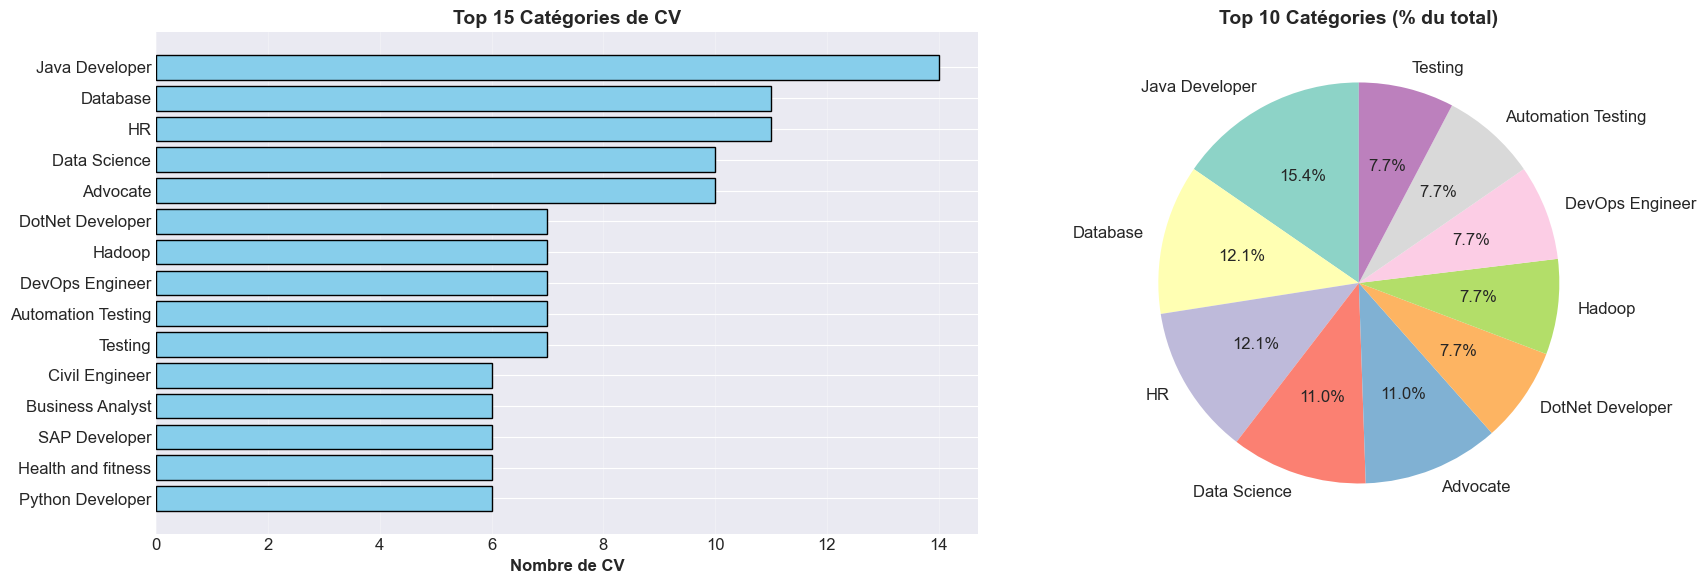

 Graphique sauvegardé dans outputs/plots/category_distribution.png


In [12]:
# Visualisation 1: Top 15 catégories
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Barplot horizontal
top_15 = category_counts.head(15)
axes[0].barh(range(len(top_15)), top_15.values, color='skyblue', edgecolor='black')
axes[0].set_yticks(range(len(top_15)))
axes[0].set_yticklabels(top_15.index)
axes[0].set_xlabel('Nombre de CV', fontsize=12, fontweight='bold')
axes[0].set_title('Top 15 Catégories de CV', fontsize=14, fontweight='bold')
axes[0].grid(axis='x', alpha=0.3)

# Inverser l'axe Y pour avoir la plus grande en haut
axes[0].invert_yaxis()

# Pie chart
top_10 = category_counts.head(10)
colors = plt.cm.Set3(range(len(top_10)))
axes[1].pie(top_10.values, labels=top_10.index, autopct='%1.1f%%', 
           colors=colors, startangle=90)
axes[1].set_title('Top 10 Catégories (% du total)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('../outputs/plots/category_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print(" Graphique sauvegardé dans outputs/plots/category_distribution.png")

In [13]:
# Statistiques sur les catégories
print("\n STATISTIQUES DES CATÉGORIES")
print("="*60)
print(f"Catégorie la plus fréquente: {category_counts.index[0]} ({category_counts.iloc[0]} CV)")
print(f"Catégorie la moins fréquente: {category_counts.index[-1]} ({category_counts.iloc[-1]} CV)")
print(f"Moyenne par catégorie: {category_counts.mean():.0f} CV")
print(f"Médiane par catégorie: {category_counts.median():.0f} CV")
print(f"Écart-type: {category_counts.std():.0f}")


 STATISTIQUES DES CATÉGORIES
Catégorie la plus fréquente: Java Developer (14 CV)
Catégorie la moins fréquente: PMO (3 CV)
Moyenne par catégorie: 7 CV
Médiane par catégorie: 6 CV
Écart-type: 3


### 5. Analyse du Texte des CV

In [15]:
# Identifier la colonne de texte
text_col = None
for col in ['Resume', 'resume', 'text', 'resume_text']:
    if col in df.columns:
        text_col = col
        break

print(f" Colonne de texte: '{text_col}'")

 Colonne de texte: 'Resume'


In [16]:
# Calculer les longueurs
df['text_length'] = df[text_col].astype(str).apply(len)
df['word_count'] = df[text_col].astype(str).apply(lambda x: len(x.split()))

In [17]:
# Statistiques
print(f"\n STATISTIQUES DE LONGUEUR")
print("="*60)
print("\n Longueur en caractères:")
print(df['text_length'].describe())

print("\n Nombre de mots:")
print(df['word_count'].describe())


 STATISTIQUES DE LONGUEUR

 Longueur en caractères:
count      169.000000
mean      2949.136095
std       2633.897546
min        133.000000
25%       1022.000000
50%       2346.000000
75%       3804.000000
max      14807.000000
Name: text_length, dtype: float64

 Nombre de mots:
count     169.000000
mean      418.852071
std       378.694101
min        17.000000
25%       158.000000
50%       326.000000
75%       558.000000
max      2206.000000
Name: word_count, dtype: float64


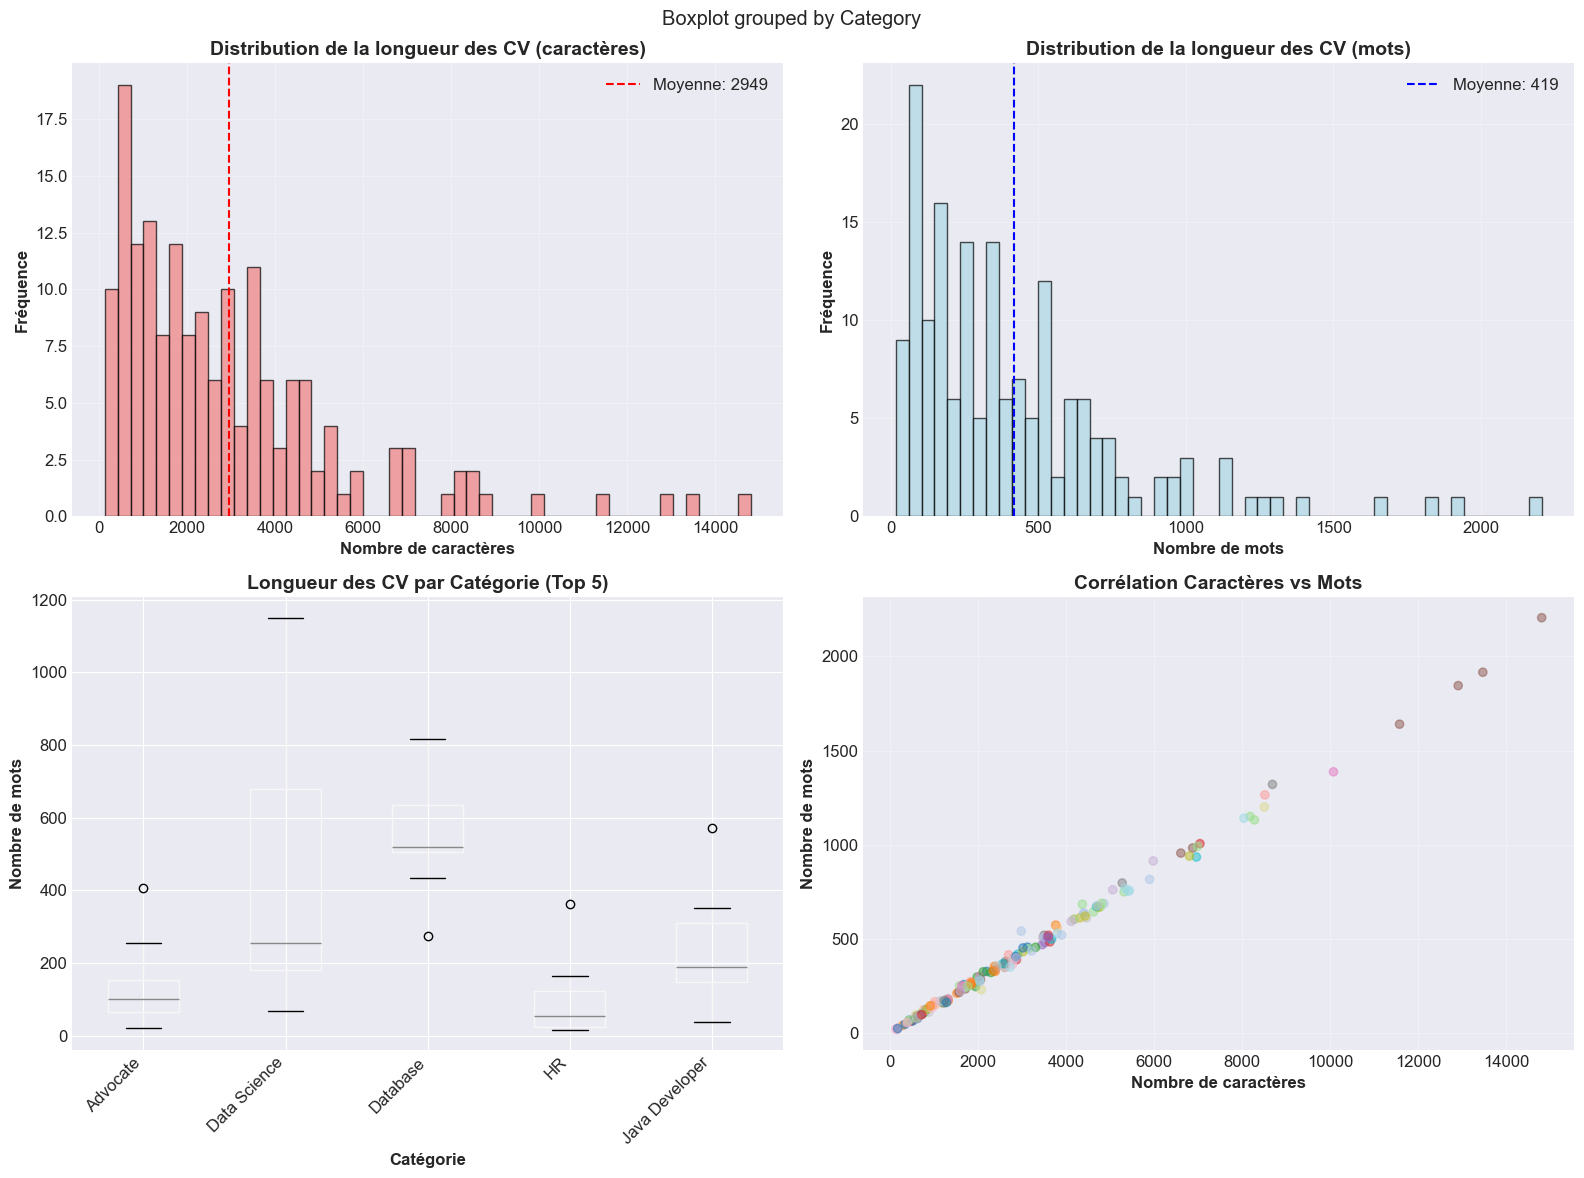

 Graphique sauvegardé dans outputs/plots/text_length_analysis.png


In [18]:
# Visualisation 2: Distribution des longueurs
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Histogramme caractères
axes[0, 0].hist(df['text_length'], bins=50, color='lightcoral', edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Nombre de caractères', fontweight='bold')
axes[0, 0].set_ylabel('Fréquence', fontweight='bold')
axes[0, 0].set_title('Distribution de la longueur des CV (caractères)', fontsize=14, fontweight='bold')
axes[0, 0].axvline(df['text_length'].mean(), color='red', linestyle='--', label=f'Moyenne: {df["text_length"].mean():.0f}')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# Histogramme mots
axes[0, 1].hist(df['word_count'], bins=50, color='lightblue', edgecolor='black', alpha=0.7)
axes[0, 1].set_xlabel('Nombre de mots', fontweight='bold')
axes[0, 1].set_ylabel('Fréquence', fontweight='bold')
axes[0, 1].set_title('Distribution de la longueur des CV (mots)', fontsize=14, fontweight='bold')
axes[0, 1].axvline(df['word_count'].mean(), color='blue', linestyle='--', label=f'Moyenne: {df["word_count"].mean():.0f}')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# Boxplot par catégorie (top 5)
top_5_categories = category_counts.head(5).index
df_top5 = df[df[category_col].isin(top_5_categories)]
df_top5.boxplot(column='word_count', by=category_col, ax=axes[1, 0])
axes[1, 0].set_xlabel('Catégorie', fontweight='bold')
axes[1, 0].set_ylabel('Nombre de mots', fontweight='bold')
axes[1, 0].set_title('Longueur des CV par Catégorie (Top 5)', fontsize=14, fontweight='bold')
plt.sca(axes[1, 0])
plt.xticks(rotation=45, ha='right')

# Scatter plot
sample_df = df.sample(min(1000, len(df)))  # Échantillon pour la lisibilité
scatter = axes[1, 1].scatter(sample_df['text_length'], sample_df['word_count'], 
                            c=sample_df[category_col].factorize()[0], 
                            alpha=0.5, cmap='tab20')
axes[1, 1].set_xlabel('Nombre de caractères', fontweight='bold')
axes[1, 1].set_ylabel('Nombre de mots', fontweight='bold')
axes[1, 1].set_title('Corrélation Caractères vs Mots', fontsize=14, fontweight='bold')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('../outputs/plots/text_length_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print(" Graphique sauvegardé dans outputs/plots/text_length_analysis.png")

### 6. Analyse des Mots Fréquents

In [20]:
# Extraire tous les mots
all_text = ' '.join(df[text_col].astype(str).values)
all_words = all_text.lower().split()

# Mots les plus fréquents
word_freq = Counter(all_words)
most_common = word_freq.most_common(30)

print("\n TOP 30 MOTS LES PLUS FRÉQUENTS")
print("="*60)
for i, (word, count) in enumerate(most_common, 1):
    print(f"{i:2d}. {word:20s} : {count:6d}")


 TOP 30 MOTS LES PLUS FRÉQUENTS
 1. and                  :   2715
 2. â¢                  :   1949
 3. -                    :   1871
 4. the                  :   1722
 5. of                   :   1420
 6. to                   :   1220
 7. in                   :    896
 8. for                  :    814
 9. exprience            :    634
10. with                 :    584
11. &                    :    577
12. company              :    576
13. details              :    534
14. months               :    521
15. description          :    482
16. project              :    476
17. on                   :    467
18. as                   :    375
19. a                    :    368
20. data                 :    341
21. is                   :    247
22. 1                    :    242
23. management           :    230
24. year                 :    224
25. from                 :    220
26. team                 :    217
27. maharashtra          :    217
28. than                 :    212
29. database   

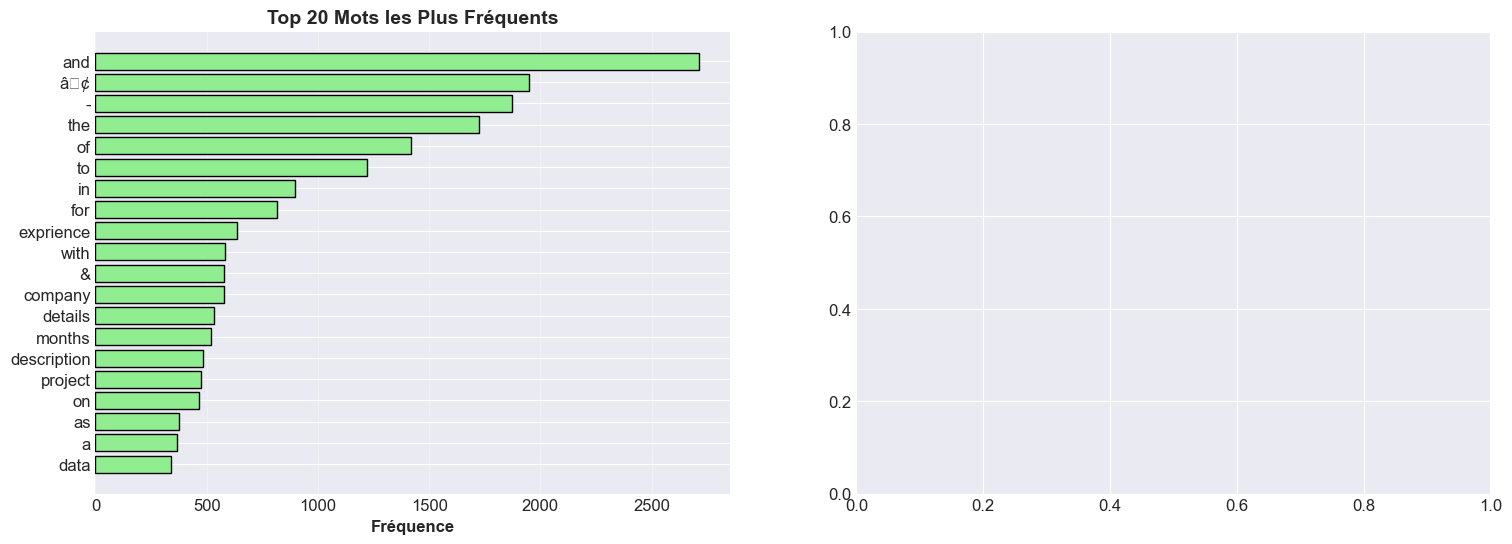

In [36]:
# Visualisation 3: Mots fréquents
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Barplot
words, counts = zip(*most_common[:20])
axes[0].barh(range(len(words)), counts, color='lightgreen', edgecolor='black')
axes[0].set_yticks(range(len(words)))
axes[0].set_yticklabels(words)
axes[0].set_xlabel('Fréquence', fontweight='bold')
axes[0].set_title('Top 20 Mots les Plus Fréquents', fontsize=14, fontweight='bold')
axes[0].invert_yaxis()
axes[0].grid(axis='x', alpha=0.3)

# WordCloud
wordcloud = WordCloud(width=800, height=400, 
                     background_color='white',
                     colormap='viridis',
                     max_words=100).generate(all_text)

axes[1].imshow(wordcloud, interpolation='bilinear')
axes[1].axis('off')
axes[1].set_title('Nuage de Mots - Tous les CV', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('../outputs/plots/word_frequency.png', dpi=300, bbox_inches='tight')
plt.show()

print(" Graphique sauvegardé dans outputs/plots/word_frequency.png")

### 7. Analyse par Catégorie

In [ ]:
# WordCloud par catégorie (top 3 catégories)
top_3_categories = category_counts.head(3).index

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

for i, category in enumerate(top_3_categories):
    category_text = ' '.join(df[df[category_col] == category][text_col].astype(str).values)
    
    wordcloud = WordCloud(width=600, height=400,
                         background_color='white',
                         colormap='plasma',
                         max_words=50).generate(category_text)
    
    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].axis('off')
    axes[i].set_title(f'{category}\n({category_counts[category]} CV)', 
                     fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('../outputs/plots/wordcloud_by_category.png', dpi=300, bbox_inches='tight')
plt.show()

print(" Graphique sauvegardé dans outputs/plots/wordcloud_by_category.png")

### 8. Vérification de l'Équilibre des Classes

In [34]:
# Calculer l'équilibre
balance_ratio = category_counts.max() / category_counts.min()

print("\n ÉQUILIBRE DES CLASSES")
print("="*60)
print(f"Ratio max/min: {balance_ratio:.2f}")

if balance_ratio > 10:
    print(" Dataset fortement déséquilibré! Considérer:")
    print("   - Oversampling (SMOTE)")
    print("   - Undersampling")
    print("   - Class weights dans les modèles")
elif balance_ratio > 3:
    print(" Dataset modérément déséquilibré")
    print("   - Utiliser class_weight='balanced' dans les modèles")
else:
    print(" Dataset relativement équilibré")


 ÉQUILIBRE DES CLASSES
Ratio max/min: 4.67
 Dataset modérément déséquilibré
   - Utiliser class_weight='balanced' dans les modèles


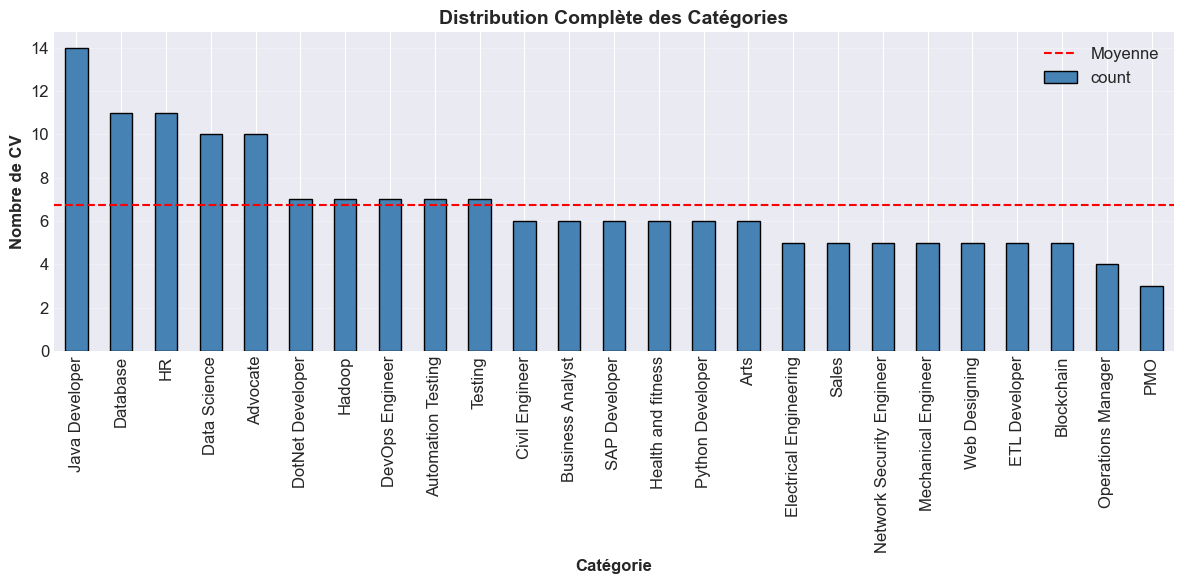

 Graphique sauvegardé dans outputs/plots/class_balance.png


In [36]:
# Visualiser l'équilibre
plt.figure(figsize=(12, 6))
category_counts.plot(kind='bar', color='steelblue', edgecolor='black')
plt.axhline(category_counts.mean(), color='red', linestyle='--', label='Moyenne')
plt.xlabel('Catégorie', fontweight='bold')
plt.ylabel('Nombre de CV', fontweight='bold')
plt.title('Distribution Complète des Catégories', fontsize=14, fontweight='bold')
plt.xticks(rotation=90)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('../outputs/plots/class_balance.png', dpi=300, bbox_inches='tight')
plt.show()

print(" Graphique sauvegardé dans outputs/plots/class_balance.png")

### 9. Exemple de CV par Catégorie

In [39]:
# Afficher un exemple de CV pour chaque top 5 catégories
print("\n EXEMPLES DE CV PAR CATÉGORIE")
print("="*80)

for category in category_counts.head(3).index:
    sample_cv = df[df[category_col] == category].iloc[0]
    
    print(f"\n{'='*80}")
    print(f"CATÉGORIE: {category}")
    print(f"{'='*80}")
    print(f"\nTexte (500 premiers caractères):")
    print(sample_cv[text_col][:500] + "...")
    print(f"\nLongueur totale: {len(sample_cv[text_col])} caractères")


 EXEMPLES DE CV PAR CATÉGORIE

CATÉGORIE: Java Developer

Texte (500 premiers caractères):
Education Details 
August 2010 to May 2017 BE Electronics & Communication Jabalpur, Madhya Pradesh Takshshila institute of technologyJava developerSkill Details 
Java, Javascript,- Exprience - 6 monthsCompany Details 
company - Wab It Softwere Pvt.  Ltd.
description - Jr. Java Developer...

Longueur totale: 291 caractères

CATÉGORIE: Database

Texte (500 premiers caractères):
TECHNICAL EXPERTISE â¢ DB Languages: SQL â¢ Database Tools: SQL Server 2014/ 2017 Postgresql 9.5, 9.6, Oracle 11gR2 â¢ Operating Systems: Redhat Linux, Oracle Linux, Windows Server 2012/ 2016 OTHER TECHNICAL SKILLS ORACLE 11G R2 â¢ Proficient in Oracle Database Software Installation, Creation of Database using GUI/Silent DBCA, Architecture, File management, Space Management, User Management, Creating Roles and assigning Privileges/Roles in 11gR2 and troubleshooting them. â¢ Hands on experie...

Longueur totale: 4865 ca

### 10. Résumé et Insights Clés

In [42]:
print("\n" + "="*80)
print(" RÉSUMÉ DE L'EXPLORATION DES DONNÉES")
print("="*80)

print(f"""
 DONNÉES GÉNÉRALES:
   - Nombre total de CV: {len(df)}
   - Nombre de catégories: {df[category_col].nunique()}
   - Colonnes: {df.columns.tolist()}
   - Valeurs manquantes: {"Non" if df.isnull().sum().sum() == 0 else "Oui"}

 CARACTÉRISTIQUES DU TEXTE:
   - Longueur moyenne: {df['text_length'].mean():.0f} caractères ({df['word_count'].mean():.0f} mots)
   - Longueur min: {df['text_length'].min()} caractères
   - Longueur max: {df['text_length'].max()} caractères

 DISTRIBUTION DES CATÉGORIES:
   - Catégorie dominante: {category_counts.index[0]} ({category_counts.iloc[0]} CV)
   - Catégorie la moins représentée: {category_counts.index[-1]} ({category_counts.iloc[-1]} CV)
   - Ratio déséquilibre: {balance_ratio:.2f}

 PROCHAINES ÉTAPES:
   1. Prétraitement du texte (nettoyage, normalisation)
   2. Feature extraction (TF-IDF, Word2Vec)
   3. Gestion du déséquilibre si nécessaire
   4. Entraînement des modèles de classification
""")



 RÉSUMÉ DE L'EXPLORATION DES DONNÉES

 DONNÉES GÉNÉRALES:
   - Nombre total de CV: 169
   - Nombre de catégories: 25
   - Colonnes: ['Category', 'Resume', 'text_length', 'word_count']
   - Valeurs manquantes: Non

 CARACTÉRISTIQUES DU TEXTE:
   - Longueur moyenne: 2949 caractères (419 mots)
   - Longueur min: 133 caractères
   - Longueur max: 14807 caractères

 DISTRIBUTION DES CATÉGORIES:
   - Catégorie dominante: Java Developer (14 CV)
   - Catégorie la moins représentée: PMO (3 CV)
   - Ratio déséquilibre: 4.67

 PROCHAINES ÉTAPES:
   1. Prétraitement du texte (nettoyage, normalisation)
   2. Feature extraction (TF-IDF, Word2Vec)
   3. Gestion du déséquilibre si nécessaire
   4. Entraînement des modèles de classification



### 11. Sauvegarde des Statistiques

In [47]:
# Créer un rapport récapitulatif
summary_stats = {
    'total_cv': len(df),
    'n_categories': df[category_col].nunique(),
    'avg_length_chars': df['text_length'].mean(),
    'avg_length_words': df['word_count'].mean(),
    'most_common_category': category_counts.index[0],
    'least_common_category': category_counts.index[-1],
    'class_imbalance_ratio': balance_ratio
}

# Sauvegarder en JSON
import json
with open('../outputs/eda_summary.json', 'w') as f:
    json.dump(summary_stats, f, indent=2)

print(" Statistiques sauvegardées dans outputs/eda_summary.json")

# Sauvegarder le DataFrame avec les nouvelles colonnes
df.to_csv('../data/processed/resume_with_stats.csv', index=False)
print(" DataFrame enrichi sauvegardé dans data/processed/resume_with_stats.csv")

 Statistiques sauvegardées dans outputs/eda_summary.json
 DataFrame enrichi sauvegardé dans data/processed/resume_with_stats.csv


###  ----------------------------------------------------------
####  FIN DE L'EXPLORATION

#### **Conclusions** :
##### - Dataset prêt pour le prétraitement
##### - Insights clés identifiés
##### - Visualisations créées
##### - Prochaine étape : Nettoyage du texte (Notebook 02)